In [2]:
import pandas as pd

df = pd.read_csv('raw_data/df_preprocessed_27082024.csv')

df.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_HighspentLargevaluepayments,Payment_Behaviour_HighspentMediumvaluepayments,Payment_Behaviour_HighspentSmallvaluepayments,Payment_Behaviour_LowspentLargevaluepayments,Payment_Behaviour_LowspentMediumvaluepayments,Payment_Behaviour_LowspentSmallvaluepayments,Credit_Score
0,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.196635,-0.2,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-1.000000,-0.888889,0.196635,-0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-0.833333,-0.777778,0.091483,-0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-0.722222,-1.111111,-0.329127,-0.2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,-0.555556,-0.346209,-0.5,-0.333333,-0.769231,0.25,-0.666667,-0.888889,0.196635,-0.2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


In [3]:
import pickle

file_name = 'raw_data/best_xgb_5.sav'

# Load the model without compression
with open(file_name, 'rb') as f:
    loaded_model = pickle.load(f)

# Verify the loaded model
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.65, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.099, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=38, max_leaves=None,
              min_child_weight=0.2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=565, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [6]:
from sklearn.model_selection import train_test_split
y = df['Credit_Score']
X = df.drop(columns=['Credit_Score'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70000, 45), (30000, 45), (70000,), (30000,))

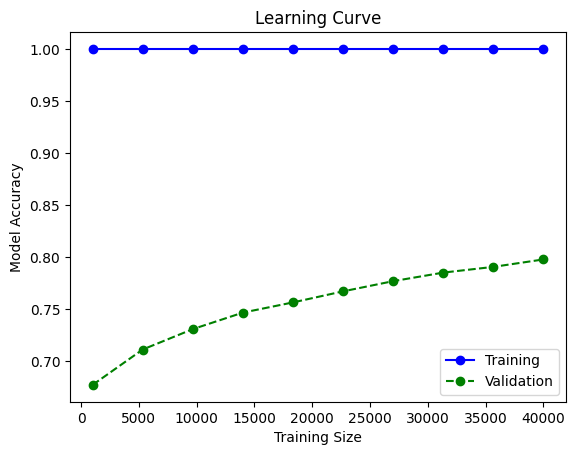

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate training sizes and calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(loaded_model, X_train, y_train,
                                                        train_sizes=np.linspace(1000, 40000, 10, dtype=int),
                                                        cv=5)

# Calculate mean scores across the folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training')
plt.plot(train_sizes, test_scores_mean, 'o--', color='green', label='Validation')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()